<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/DSBM_Crime_Prediction_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASELINE MODELS

In [55]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

df_train_clf = pd.read_csv('https://raw.githubusercontent.com/Jlokkerbol/practice_datasets/main/df_train_class17.csv')
df_train_reg = pd.read_csv('https://raw.githubusercontent.com/Jlokkerbol/practice_datasets/main/df_train17.csv')

In [56]:
df_train_clf.head()

,Region,Year,change_one_year_ago,change_two_years_ago,Crimes_two_years_ago,Crimes_previous_year,Crimes_current_year,Crime_class,Inhabitants,Men,...,Households_below_poverty_level,Passenger_cars_total,Passenger_cars_per_household,Passenger_cars_per_area,Distance_to_GP,Distance_to_supermarket,Distance_to_daycare,Distance_to_school,Schools_within_3k,Address_density
0,GM0003,2007,increased,decreased,1.8,-0.5,53.2,decreased,12190.0,5930,...,6.0,4925,0.9,207,0.8,0.9,1.3,0.7,7.4,954
1,GM0003,2008,decreased,increased,1.2,1.7,51.5,decreased,12130.0,5870,...,6.0,5030,0.9,211,0.8,0.8,1.0,0.7,7.4,927
2,GM0003,2009,decreased,decreased,3.0,1.3,50.2,decreased,12110.0,5850,...,8.0,5085,0.9,214,1.0,0.8,1.3,0.7,7.4,930
3,GM0003,2010,decreased,decreased,1.5,0.2,50.0,increased,12030.0,5790,...,8.0,5170,0.9,217,0.9,0.8,1.3,0.7,7.4,943
4,GM0003,2011,increased,decreased,-4.6,-4.8,54.8,decreased,12090.0,5870,...,10.0,5220,0.9,220,1.1,0.8,1.3,0.7,7.3,960


In [57]:
df_train_reg.head()

,Region,Year,Crimes_two_years_ago,Crimes_previous_year,Crimes_current_year,Crimes_next_year,Inhabitants,Men,Women,X0.15_yo,...,Households_below_poverty_level,Passenger_cars_total,Passenger_cars_per_household,Passenger_cars_per_area,Distance_to_GP,Distance_to_supermarket,Distance_to_daycare,Distance_to_school,Schools_within_3k,Address_density
0,GM0003,2007,1.8,-0.5,53.2,51.5,12190.0,5930,6260,16,...,6.0,4925,0.9,207,0.8,0.9,1.3,0.7,7.4,954
1,GM0003,2008,1.2,1.7,51.5,50.2,12130.0,5870,6260,16,...,6.0,5030,0.9,211,0.8,0.8,1.0,0.7,7.4,927
2,GM0003,2009,3.0,1.3,50.2,50.0,12110.0,5850,6260,16,...,8.0,5085,0.9,214,1.0,0.8,1.3,0.7,7.4,930
3,GM0003,2010,1.5,0.2,50.0,54.8,12030.0,5790,6240,16,...,8.0,5170,0.9,217,0.9,0.8,1.3,0.7,7.4,943
4,GM0003,2011,-4.6,-4.8,54.8,44.5,12090.0,5870,6220,16,...,10.0,5220,0.9,220,1.1,0.8,1.3,0.7,7.3,960


In [58]:
X_train = df_train_clf.loc[:,df_train_clf.columns!='Crime_class']
y_train_clf = df_train_clf['Crime_class'].values
y_train_reg = df_train_reg['Crimes_next_year'].values

In [59]:
num_attribs = list(X_train.select_dtypes(exclude='object'))
cat_attribs = list(X_train.select_dtypes(include='object'))

In [60]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                         ('std_scaler', StandardScaler()),
                         ])

In [61]:
full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(sparse=False), cat_attribs),
                                   ])

In [62]:
X_prepared = full_pipeline.fit_transform(X_train)

In [63]:
cat_names = OneHotEncoder(sparse=False).fit(X_train[cat_attribs]).get_feature_names().tolist()
pd.DataFrame(X_prepared, columns=[num_attribs + cat_names]).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Year,Crimes_two_years_ago,Crimes_previous_year,Crimes_current_year,Inhabitants,Men,Women,X0.15_yo,X15.25_yo,X25.45_yo,...,x0_GM1895,x0_GM1896,x0_GM1916,x0_GM1926,x0_GM1955,x0_GM1987,x1_decreased,x1_increased,x2_decreased,x2_increased
0,-1.549193,-0.303545,-0.467766,0.013611,-0.463728,-0.469547,-0.458013,-0.184720,-0.167185,-0.149526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-1.161895,-0.398213,-0.038383,-0.069386,-0.464652,-0.471425,-0.458013,-0.184720,-0.166902,-0.149526,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.774597,-0.114209,-0.116453,-0.132854,-0.464960,-0.472051,-0.458013,-0.184720,-0.167185,-0.149650,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.387298,-0.350879,-0.331144,-0.142619,-0.466192,-0.473928,-0.458619,-0.184720,-0.167185,-0.149650,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.000000,-1.313338,-1.307013,0.091725,-0.465268,-0.471425,-0.459225,-0.184720,-0.167185,-0.149650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.387298,0.280242,1.640113,-0.411138,-0.465807,-0.472989,-0.458922,-0.184720,-0.167185,-0.149774,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.774597,1.416259,0.098239,-0.528310,-0.465884,-0.472520,-0.459377,-0.184950,-0.167185,-0.149897,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,1.161895,-0.082653,-0.214040,-0.567368,-0.465653,-0.472207,-0.459377,-0.184950,-0.166902,-0.149897,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,1.549193,0.217130,0.469069,-0.777301,-0.466484,-0.473396,-0.459710,0.239207,0.181475,0.166122,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,-1.549193,-0.492881,-0.565353,-0.840769,-0.488214,-0.488326,-0.488022,-0.183799,-0.166618,-0.149526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [64]:
X_prepared.shape

(3384, 442)

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [66]:
lasso = LassoCV(cv=5, random_state=42, n_jobs=-1).fit(X_prepared, y_train_reg)

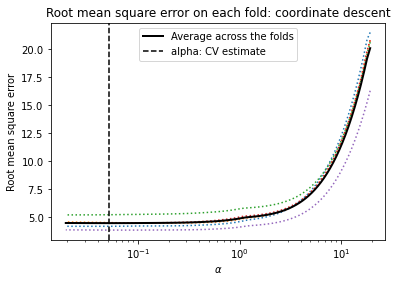

In [67]:
import matplotlib.pyplot as plt

plt.figure()
plt.semilogx(lasso.alphas_, np.sqrt(lasso.mse_path_), ":")
plt.plot(
    lasso.alphas_,
    np.sqrt(lasso.mse_path_.mean(axis=-1)),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)
plt.legend()
plt.xlabel(r"$\alpha$")
plt.ylabel("Root mean square error")
plt.title("Root mean square error on each fold: coordinate descent")
plt.axis("tight");

In [68]:
from sklearn.metrics import mean_squared_error
print("Best Lasso model:\n"
      f"  RMSE: {np.sqrt(mean_squared_error(lasso.predict(X_prepared), y_train_reg)):.2f}\n"
      f"  alpha: {lasso.alpha_:.2f}")

Best Lasso model:
  RMSE: 4.42
  alpha: 0.05


In [69]:
X_columns = pd.Series(num_attribs+cat_names)
pd.set_option("display.max.rows", None)
pd.concat({'coef_abs': pd.Series(abs(lasso.coef_)), 'coef': pd.Series(lasso.coef_), 'feature': X_columns}, axis=1).sort_values('coef_abs', ascending=False)

,coef_abs,coef,feature
3,18.435649,18.435649,Crimes_current_year
2,0.960078,0.960078,Crimes_previous_year
0,0.938677,-0.938677,Year
45,0.724318,0.724318,Gas_Terraced_homes
1,0.676761,0.676761,Crimes_two_years_ago
30,0.539409,-0.539409,Household_size
440,0.525301,0.525301,x2_decreased
24,0.425619,0.425619,Death_total
52,0.307585,-0.307585,Households_below_poverty_level
54,0.144220,-0.144220,Passenger_cars_per_household


## How could you enhance this regression model? 

Any logical next steps to take? Please add some code blocks and run a new regression model.

## Decision Tree

Another typical baseline model to run is the decision tree. Let's build a decision tree without the Region variable

In [70]:
X_train_exR = X_train.drop(['Region'], axis=1)
cat_attribs_exR = list(X_train_exR.select_dtypes(include='object'))
cat_attribs_exR

['change_one_year_ago', 'change_two_years_ago']

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

cart = Pipeline(
    steps=[
        ("cart", DecisionTreeClassifier()),
    ]
)

cart_parameters = {
'cart__max_depth': [2, 3],
'cart__min_samples_leaf': [0.02, 0.05],
}



In [72]:
# prepare the data by applying one hot encoding to categorical features
num_pipeline_tree = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                         ])

full_pipeline_tree = ColumnTransformer([
                                   ('num', num_pipeline_tree, num_attribs),
                                   ('cat', OneHotEncoder(sparse=False), cat_attribs_exR),
                                   ])

X_prepared_tree = full_pipeline_tree.fit_transform(X_train_exR)
X_prepared_tree.shape

(3384, 66)

In [73]:
cat_names_exR = OneHotEncoder(sparse=False).fit(X_train_exR[cat_attribs_exR]).get_feature_names().tolist()
pd.DataFrame(X_prepared_tree, columns = [num_attribs+cat_names_exR]).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Year,Crimes_two_years_ago,Crimes_previous_year,Crimes_current_year,Inhabitants,Men,Women,X0.15_yo,X15.25_yo,X25.45_yo,...,Distance_to_GP,Distance_to_supermarket,Distance_to_daycare,Distance_to_school,Schools_within_3k,Address_density,x0_decreased,x0_increased,x1_decreased,x1_increased
0,2007.0,1.8,-0.5,53.2,12190.0,5930.0,6260.0,16.0,10.0,25.0,...,0.8,0.9,1.3,0.7,7.4,954.0,0.0,1.0,1.0,0.0
1,2008.0,1.2,1.7,51.5,12130.0,5870.0,6260.0,16.0,11.0,25.0,...,0.8,0.8,1.0,0.7,7.4,927.0,1.0,0.0,0.0,1.0
2,2009.0,3.0,1.3,50.2,12110.0,5850.0,6260.0,16.0,10.0,24.0,...,1.0,0.8,1.3,0.7,7.4,930.0,1.0,0.0,1.0,0.0
3,2010.0,1.5,0.2,50.0,12030.0,5790.0,6240.0,16.0,10.0,24.0,...,0.9,0.8,1.3,0.7,7.4,943.0,1.0,0.0,1.0,0.0
4,2011.0,-4.6,-4.8,54.8,12090.0,5870.0,6220.0,16.0,10.0,24.0,...,1.1,0.8,1.3,0.7,7.3,960.0,0.0,1.0,1.0,0.0


In [74]:
%%time
cart_search = GridSearchCV(cart, cart_parameters, cv=5)
_ = cart_search.fit(X_prepared_tree, y_train_clf);

CPU times: user 628 ms, sys: 0 ns, total: 628 ms
Wall time: 629 ms


In [75]:
cart_search.best_estimator_['cart']

DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.02)

In [77]:
from sklearn.tree import export_graphviz
names = pd.Series(num_attribs+cat_names_exR)
export_graphviz(cart_search.best_estimator_['cart'], 'tree.dot', feature_names = names)

In [78]:
!dot -Tpng tree.dot -o tree.png

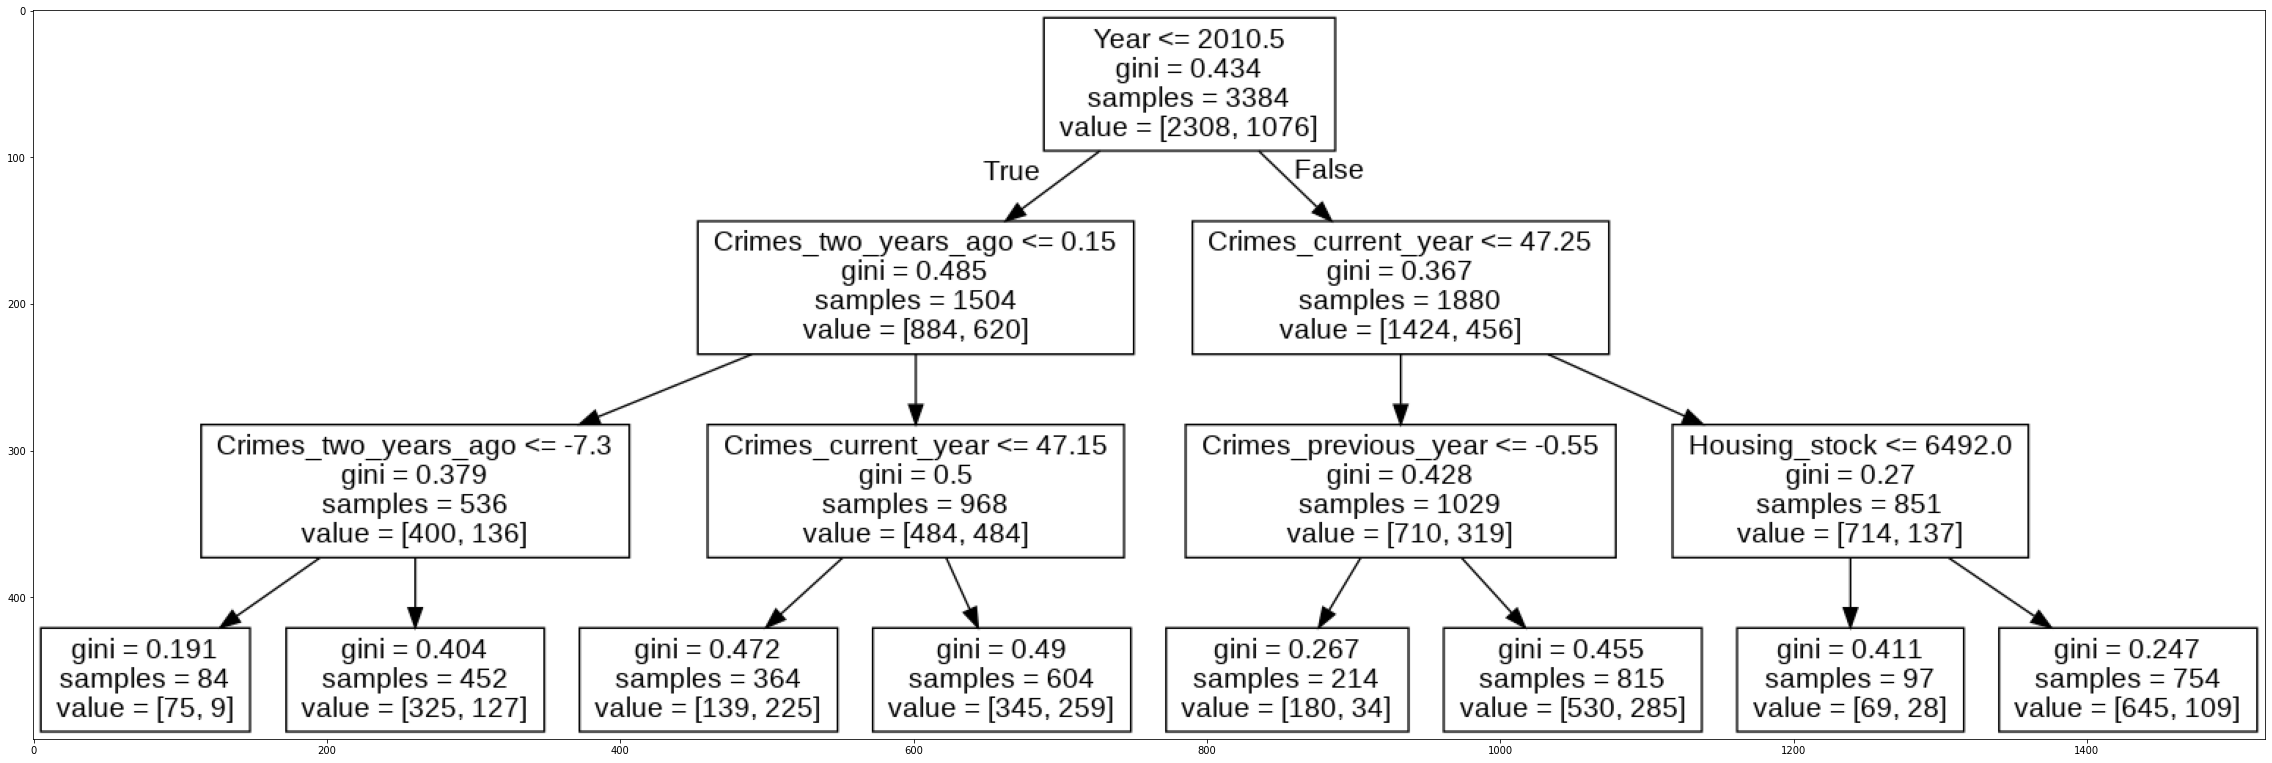

In [79]:
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (40, 40))
plt.imshow(img)

- What do you conclude from the tree?
- Do we have valuable features?
- Does this contain information for how to improve the regression?
- Try to create a new tree which allows for a higher number of splits (a deeper tree)